In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# NFK international airport data (wind/precipitation)

In [2]:
#import wind/precipitation data
infile_NFK_airport='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/NCDC_NOAA_precipitation_wind_2000_2018_NFK_IntAirp.csv'
NFK_airport=pd.read_csv(infile_NFK_airport)
#NFK_airport.head()

In [3]:
NFKairport_dayssince = ((NFK_airport.year - 1900)*364.75) + (NFK_airport.month*(364.75/12)) + NFK_airport.day
#NFKairport_dayssince

Text(0.5, 1.0, 'Daily wind speed from NFK international airport')

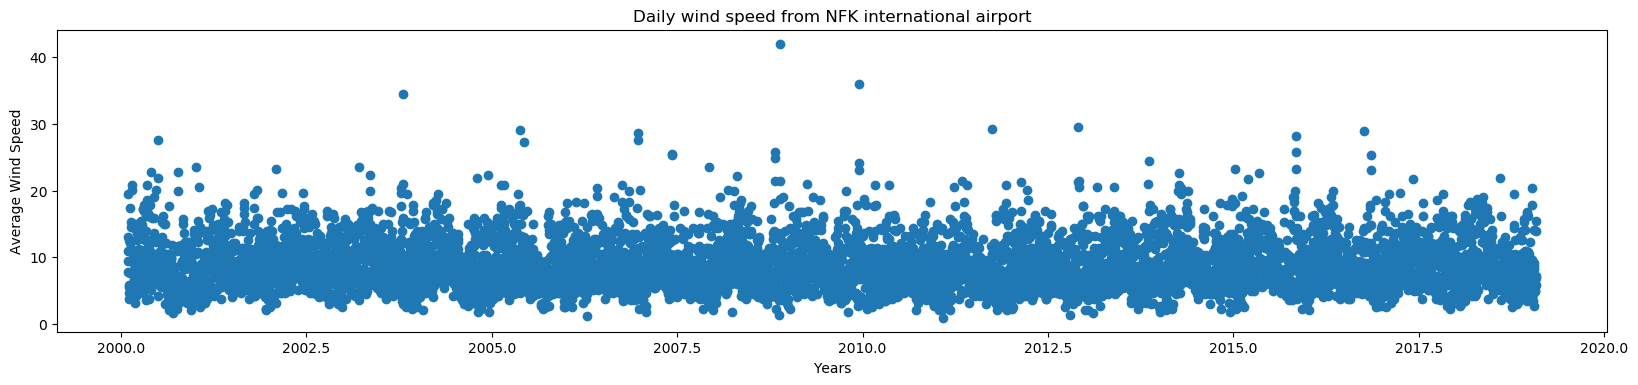

In [4]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+NFKairport_dayssince/364.75,NFK_airport.AWND)
plt.xlabel('Years')
plt.ylabel('Average Wind Speed')
plt.title('Daily wind speed from NFK international airport')

(2016.1, 2016.2)

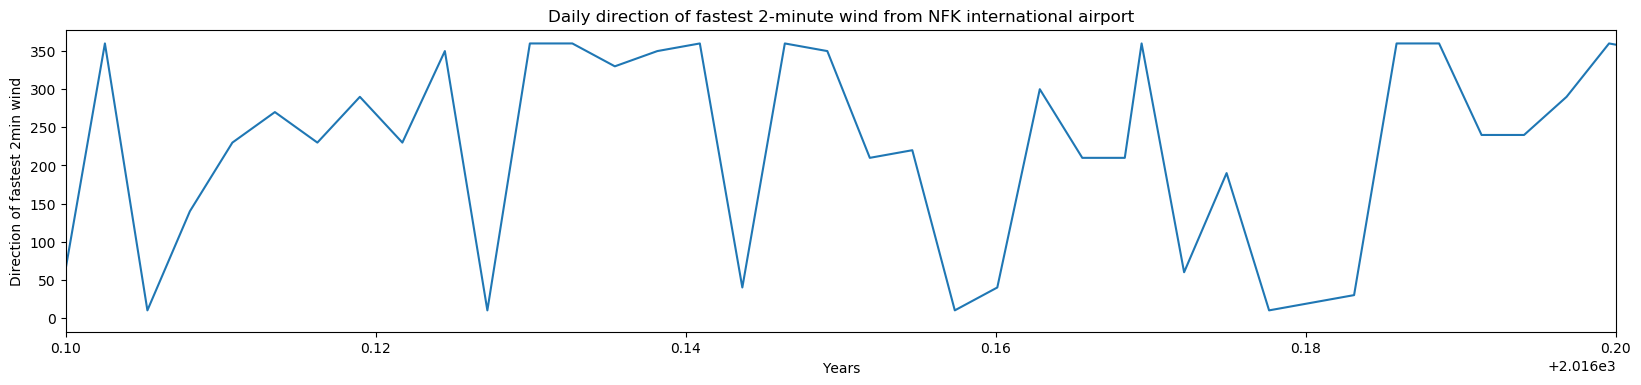

In [5]:
# Direction of fastest 2-minute wind (WDF2) 

fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.plot(1900+NFKairport_dayssince/364.75,NFK_airport.WDF2)
plt.xlabel('Years')
plt.ylabel('Direction of fastest 2min wind')
plt.title('Daily direction of fastest 2-minute wind from NFK international airport')
plt.xlim(2016.1,2016.2)

# Apply a filter to wind speed for those sustained winds in the direction that enhaces flooding

Wind direction is reported by the direction from which it originates. For example, a northerly wind blows from the north to the south.[1] Wind direction is usually reported in cardinal directions or in azimuth degrees. Wind direction is measured in degrees clockwise from due north. 

Consequently, a wind blowing from the north has a wind direction of 0° (360°); a wind blowing from the east has a wind direction of 90°; a wind blowing from the south has a wind direction of 180°; and a wind blowing from the west has a wind direction of 270°.

https://en.wikipedia.org/wiki/Wind_direction

a north-eastern wind will have a range of direction from >0 to <90° 

Text(0.5, 1.0, 'wind speed from north-eastern winds only')

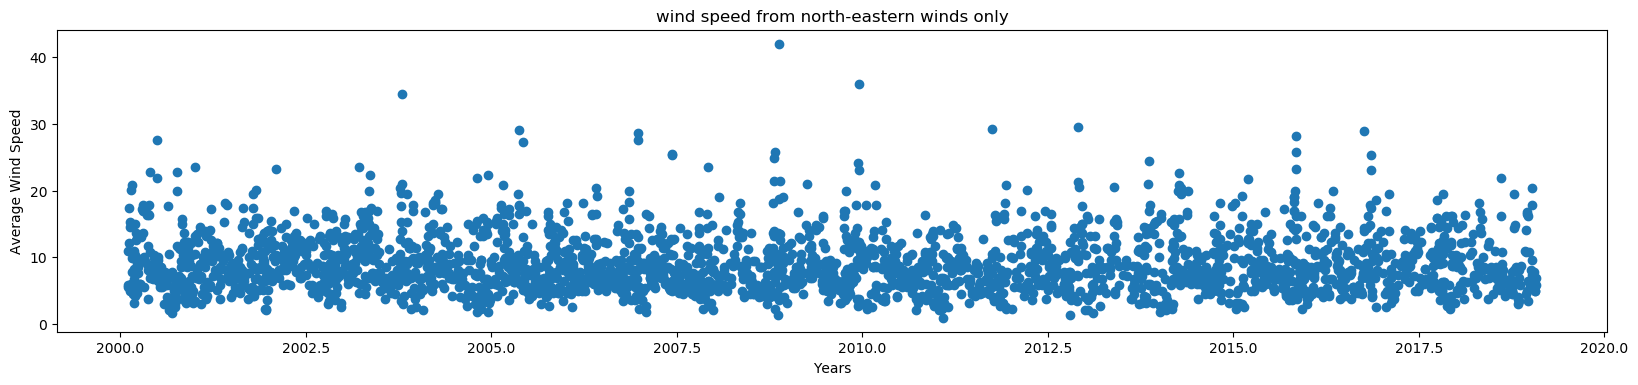

In [7]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+NFKairport_dayssince[(NFK_airport.WDF2>0)&(NFK_airport.WDF2<90)]/364.75,NFK_airport.AWND[(NFK_airport.WDF2>0)&(NFK_airport.WDF2<90)])
plt.xlabel('Years')
plt.ylabel('Average Wind Speed')
plt.title('wind speed from north-eastern winds only')

In [9]:
# make plot for the other variables in the doc (i.e. precipitation)

Text(0.5, 1.0, 'Daily precipitation from NFK international airport')

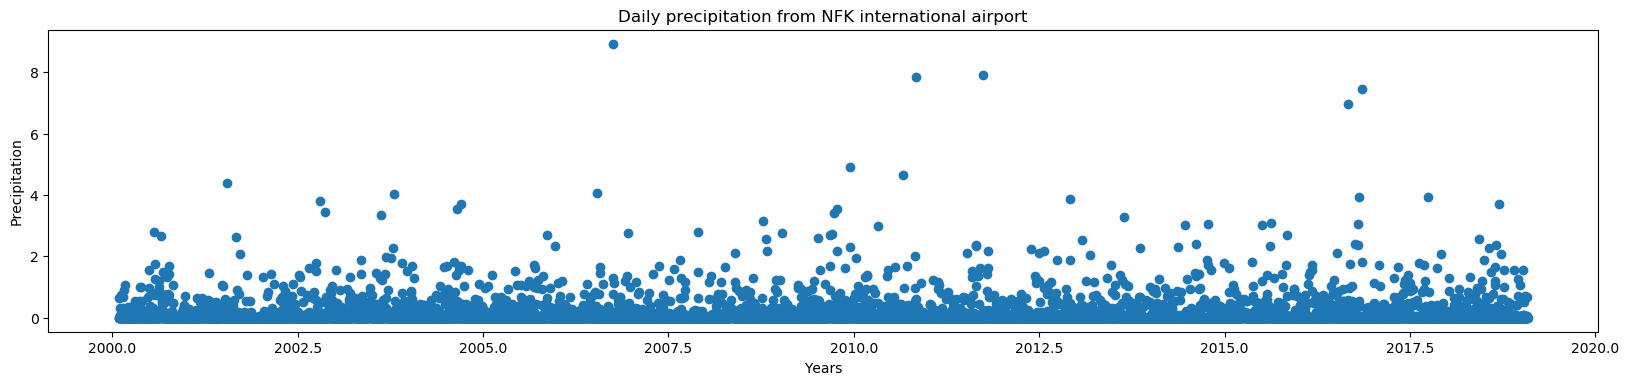

In [10]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+NFKairport_dayssince/364.75,NFK_airport.PRCP)
plt.xlabel('Years')
plt.ylabel('Precipitation')
plt.title('Daily precipitation from NFK international airport')

# Virginia Estuarine and Coastal Observing System (VECOS) data (i.e. NO3)

In [11]:
# upload VECOS data to have nitrate concentrations available. Plot in a similar maner to wind and precipitation values

In [12]:
#import VECOS (i.e. nutrients) data
infile_VECOS_Laf_head='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/VECOS Lafayette/VECOS head lafayette_Granby_ long term monitoring station 1998 to 2018.csv'
VECOS_Laf_head=pd.read_csv(infile_VECOS_Laf_head)
#VECOS_Laf_head

In [13]:
VECOS_Laf_head.columns

Index(['Station', 'EventID', 'Cruise', 'Program', 'Project', 'Agency',
       'Source', 'Station.1', 'date', 'month', 'day', 'year', 'time',
       'TotalDepth', 'uppicno', 'lowpicno', 'depth', 'layer', 'SampleType',
       'Replicate', 'Parameter', 'Qualifier', 'value', 'unit', 'Method', 'Lab',
       'Problem', 'Precision', 'BiasPC', 'Details', 'Lat', 'Long'],
      dtype='object')

In [14]:
VECOS_filter=VECOS_Laf_head[(VECOS_Laf_head.year>1999)&(VECOS_Laf_head.depth<1.5)]
VECOS_filter.Parameter.unique()

array(['CHLA', 'DIN', 'DO', 'DON', 'DOP', 'FCOLI_M', 'FSS', 'KD', 'NH4F',
       'NO23F', 'NO2F', 'NO3F', 'PC', 'PH', 'PHEO', 'PN', 'PO4F', 'PP',
       'SALINITY', 'SECCHI', 'SIF', 'SIGMA_T', 'SPCOND', 'TDN', 'TDP',
       'TN', 'TON', 'TP', 'TSS', 'WTEMP', 'VSS'], dtype=object)

In [15]:
nitrate=VECOS_filter.value[VECOS_filter.Parameter == "NO23F"]
ammon=VECOS_filter.value[VECOS_filter.Parameter=="NH4F"]
#nitrate
#ammon

In [16]:
VECOS_NO3_dayssince = ((VECOS_filter.year[VECOS_filter.Parameter == "NO23F"] - 1900)*364.75) + (VECOS_filter.month[VECOS_filter.Parameter == "NO23F"]*(364.75/12)) + VECOS_filter.day[VECOS_filter.Parameter == "NO23F"]
VECOS_NH4_dayssince = ((VECOS_filter.year[VECOS_filter.Parameter == "NH4F"] - 1900)*364.75) + (VECOS_filter.month[VECOS_filter.Parameter == "NH4F"]*(364.75/12)) + VECOS_filter.day[VECOS_filter.Parameter == "NH4F"]
#VECOS_NO3_dayssince
#VECOS_NH4_dayssince

Text(0.5, 1.0, 'VECOS ammonium concentration')

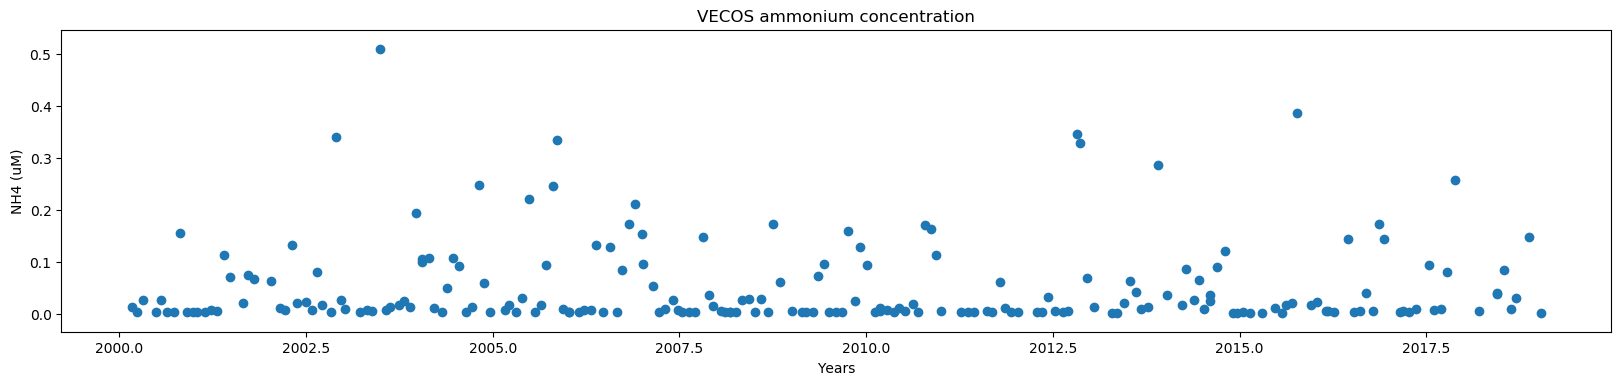

In [17]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+VECOS_NH4_dayssince/364.75,ammon)
plt.xlabel('Years')
plt.ylabel('NH4 (uM)')
plt.title('VECOS ammonium concentration')

Text(0.5, 1.0, 'VECOS nitrate concentration')

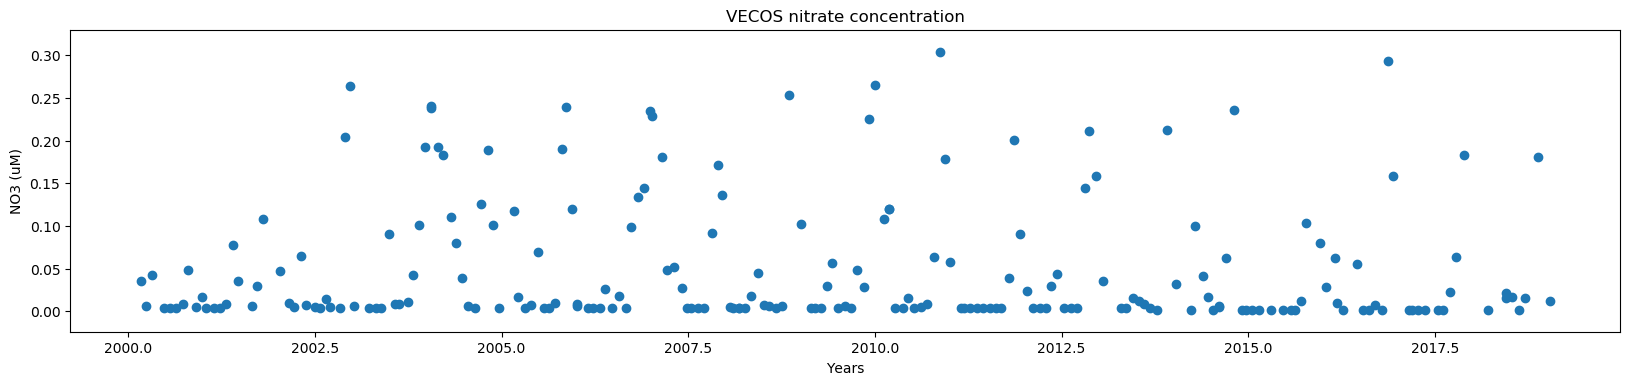

In [18]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+VECOS_NO3_dayssince/364.75,nitrate)
plt.xlabel('Years')
plt.ylabel('NO3 (uM)')
plt.title('VECOS nitrate concentration')

In [19]:
# repeat the steps with other variables

In [20]:
Chla=VECOS_filter.value[VECOS_filter.Parameter == "CHLA"]
#Chla

In [21]:
VECOS_Chla_dayssince = ((VECOS_filter.year[VECOS_filter.Parameter == "CHLA"] - 1900)*364.75) + (VECOS_filter.month[VECOS_filter.Parameter == "CHLA"]*(364.75/12)) + VECOS_filter.day[VECOS_filter.Parameter == "CHLA"]

Text(0.5, 1.0, 'VECOS chlorophyll concentration')

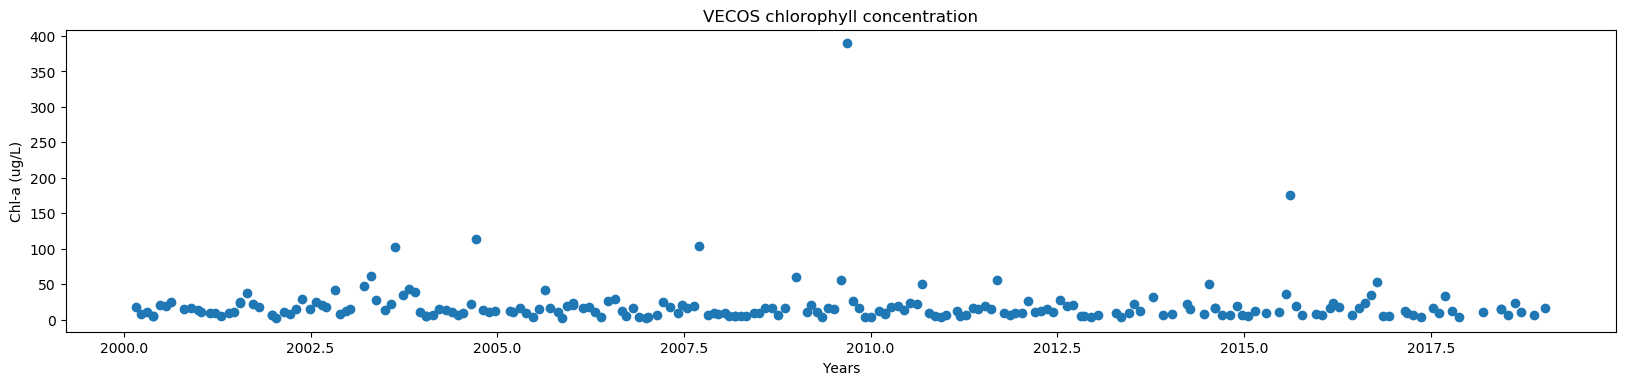

In [22]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+VECOS_Chla_dayssince/364.75,Chla)
plt.xlabel('Years')
plt.ylabel('Chl-a (ug/L)')
plt.title('VECOS chlorophyll concentration')

# Water level data from the NOAA station at Sewelles Point

In [23]:
# get the water level data from Sewells Point, NFK (VA)

In [24]:
#import Water-Level (i.e. MLLW) data
infile_MLLW_Sewells='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/MLLW_sewellspoint_2000_20018.csv'
MLLW_Sewells=pd.read_csv(infile_MLLW_Sewells)
#MLLW_Sewells

In [25]:
#MLLW_Sewells.year

In [26]:
MLLW_Sewells_dayssince = ((MLLW_Sewells.year - 1900)*364.75) + (MLLW_Sewells.month*(364.75/12)) + MLLW_Sewells.day + MLLW_Sewells.Time_GMT

Text(0.5, 1.0, 'Measured water level (MLLW in ft) at Sewells Point')

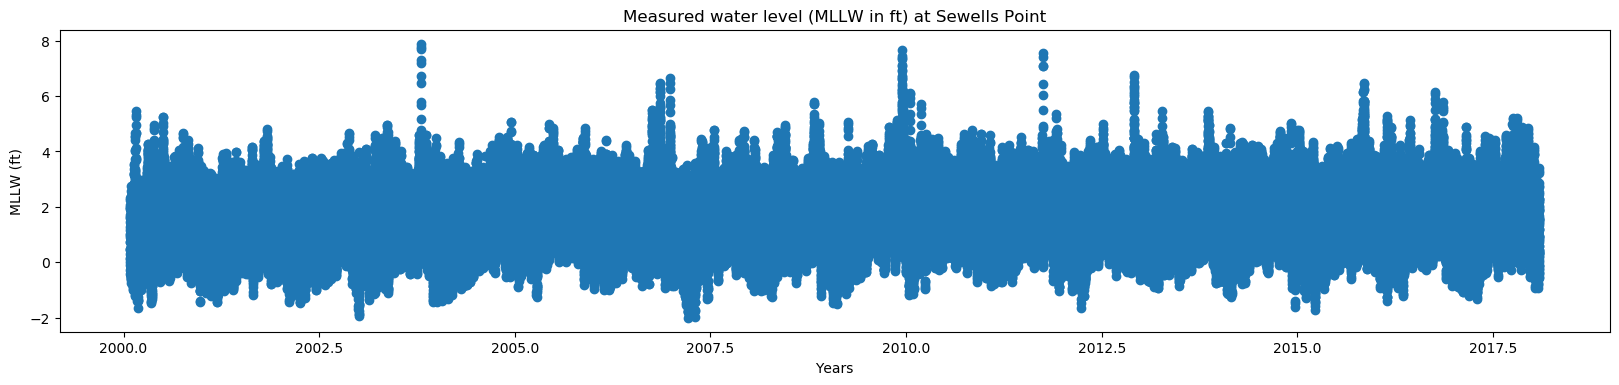

In [27]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
#plt.scatter(1900+MLLW_Sewells_dayssince/364.75,MLLW_Sewells[(MLLW_Sewells.Verified_ft>3)])
plt.scatter(1900+MLLW_Sewells_dayssince/364.75,MLLW_Sewells.Verified_ft)

plt.xlabel('Years')
plt.ylabel('MLLW (ft)')
plt.title('Measured water level (MLLW in ft) at Sewells Point')

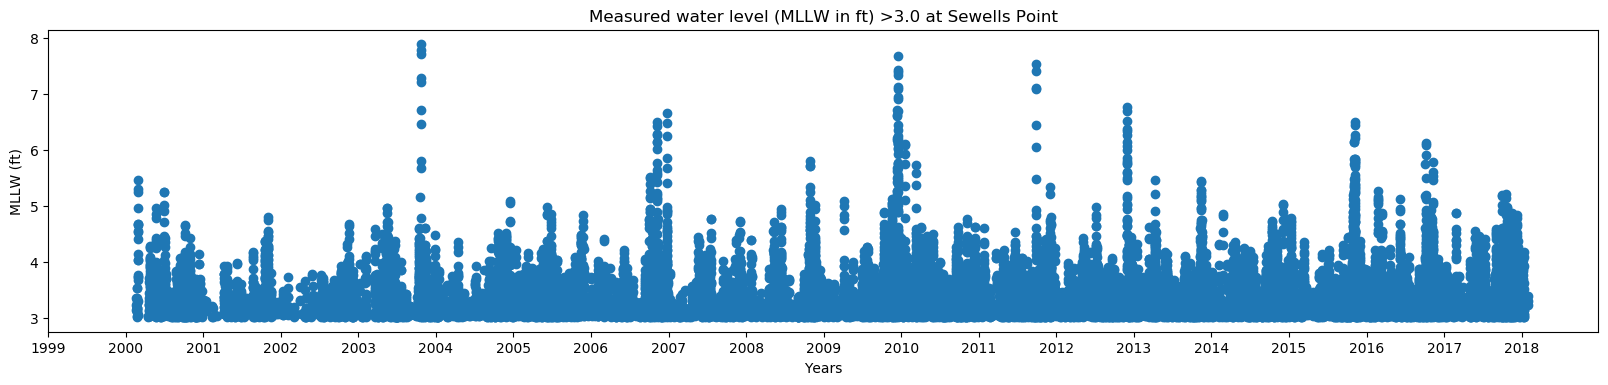

In [28]:
# filter the data to only visualyze events with "high" water level 

fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
#plt.scatter(1900+MLLW_Sewells_dayssince/364.75,MLLW_Sewells[(MLLW_Sewells.Verified_ft>3)])
plt.scatter(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3)]/364.75,MLLW_Sewells.Verified_ft[(MLLW_Sewells.Verified_ft>3)])

#nitrate=VECOS_filter.value[VECOS_filter.Parameter == "NO23F"]

plt.xlabel('Years')
plt.ylabel('MLLW (ft)')
plt.title('Measured water level (MLLW in ft) >3.0 at Sewells Point')
ax.set_xticks(np.arange(1999,2019,1))

In [30]:
# calculate the highest water level per day
MLLW_Sewells.columns

Index(['Date', 'month', 'day', 'year', 'Time_GMT', 'Predicted_ft',
       'preliminary_ft', 'Verified_ft'],
      dtype='object')

DataFrame.resample(self, rule, axis=0, closed: Union[str, NoneType] = None, label: Union[str, NoneType] = None, convention: str = 'start', kind: Union[str, NoneType] = None, loffset=None, base: int = 0, on=None, level=None)

i.e.

rule: MLLW_Sewells.Verified_ft

axis: MLLW_Sewells.day

In [32]:
max(MLLW_Sewells.Verified_ft[(MLLW_Sewells.month==1)&
                            (MLLW_Sewells.day>0)&
                            (MLLW_Sewells.day<32)&
                            (MLLW_Sewells.year==2000)])


5.46

# Compare coverage of data sets (i.e. sample frequency)

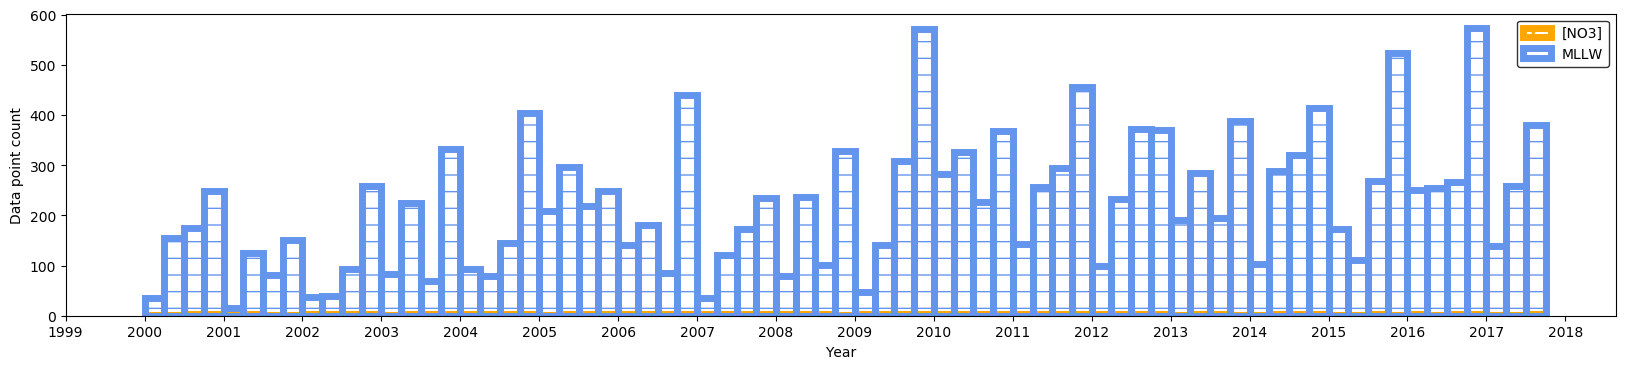

In [25]:
#sampling-date (seasonal) analysis. 
#The code for this is from the work of Corday and Austin!!

fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)

bins = np.arange(2000,2018,0.25)

#VECOS_NO3_dayssince
#MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3)]

plt.hist(1900+VECOS_NO3_dayssince/364.75, edgecolor = "orange", lw = 5, facecolor = "None", bins = bins, hatch = 'X')
plt.hist(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3)]/364.75, edgecolor = "cornflowerblue", facecolor = "None", lw = 5, bins = bins, hatch = '-')

ax.set_xlabel('Year')
ax.set_ylabel('Data point count')
ax.legend(('[NO3]', 'MLLW'), edgecolor = 'k', loc = 'upper right')
ax.set_xticks(np.arange(1999,2019,1))
#ax.set_xlim([2010.75,2017.25])

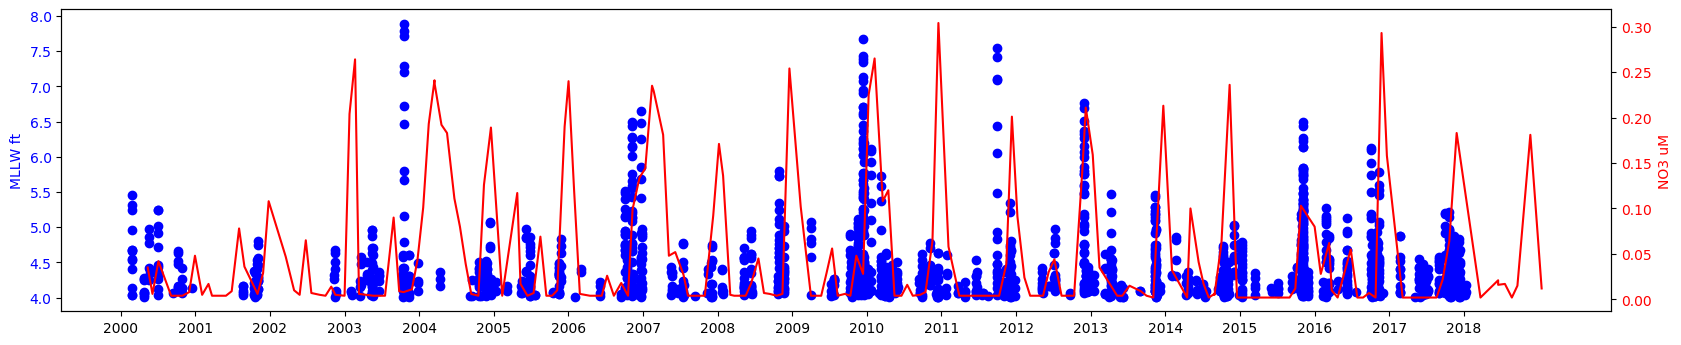

In [26]:
# plot nitrate and water level values in the same figure

fig,ax1=plt.subplots(figsize=(20,4),dpi=100,sharex='all')
ax2=ax1.twinx()

#set variable 1
l1=ax1.scatter(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>4)]/364.75,MLLW_Sewells.Verified_ft[(MLLW_Sewells.Verified_ft>4)],color='b')
ax1.set_ylabel(r'MLLW ft',color='b')
ax1.tick_params(axis='y',labelcolor='b')

#set variable 2
l2=ax2.plot(1900+VECOS_NO3_dayssince/364.75,nitrate,color='r')
ax2.set_ylabel(r'NO3 uM',color='r')
ax2.tick_params(axis='y',labelcolor='r')
ax2.set_xticks(np.arange(1999,2019,1))

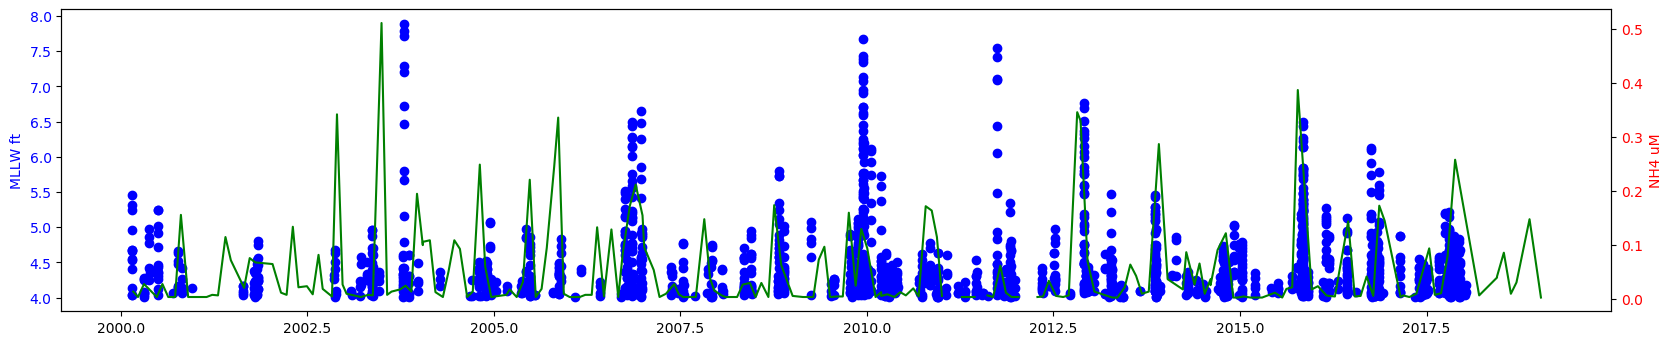

In [27]:
# plot nitrate and water level values in the same figure

fig,ax1=plt.subplots(figsize=(20,4),dpi=100,sharex='all')
ax2=ax1.twinx()

#set variable 1
l1=ax1.scatter(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>4)]/364.75,MLLW_Sewells.Verified_ft[(MLLW_Sewells.Verified_ft>4)],color='b')
ax1.set_ylabel(r'MLLW ft',color='b')
ax1.tick_params(axis='y',labelcolor='b')

#set variable 2
l2=ax2.plot(1900+VECOS_NH4_dayssince/364.75,ammon,color='g')
ax2.set_ylabel(r'NH4 uM',color='r')
ax2.tick_params(axis='y',labelcolor='r')

# Extract/calcuate the highest water level per day

In [28]:
# loop ????

# NYCC nutrient sampling data (i.e. NO3)

In [29]:
# import data
infile_NYCC_nutrient_sampling='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/NYCC2017_nutrients_summary.csv'
data_NYCC_nutrient_sampling=pd.read_csv(infile_NYCC_nutrient_sampling)
#data_NYCC_nutrient_sampling

In [30]:
data_NYCC_nutrient_sampling.columns

Index(['ID', 'Date', 'month', 'day', 'year', 'Time', 'depth_m', 'NH4_uM',
       'Urea_uM', 'NOx_uM', 'NO3_uM', 'NO2_uM', 'PO4_uM'],
      dtype='object')

In [31]:
NYCC_nutrients_filter=data_NYCC_nutrient_sampling[(data_NYCC_nutrient_sampling.depth_m<1.5)]
#NYCC_nutrients_filter

In [32]:
NO3_daysince_NYCC=((NYCC_nutrients_filter.year - 1900)*364.75) + (NYCC_nutrients_filter.month*(364.75/12)) + NYCC_nutrients_filter.day
#NO3_daysince_NYCC

Text(0.5, 1.0, 'NYCC nitrate concentration')

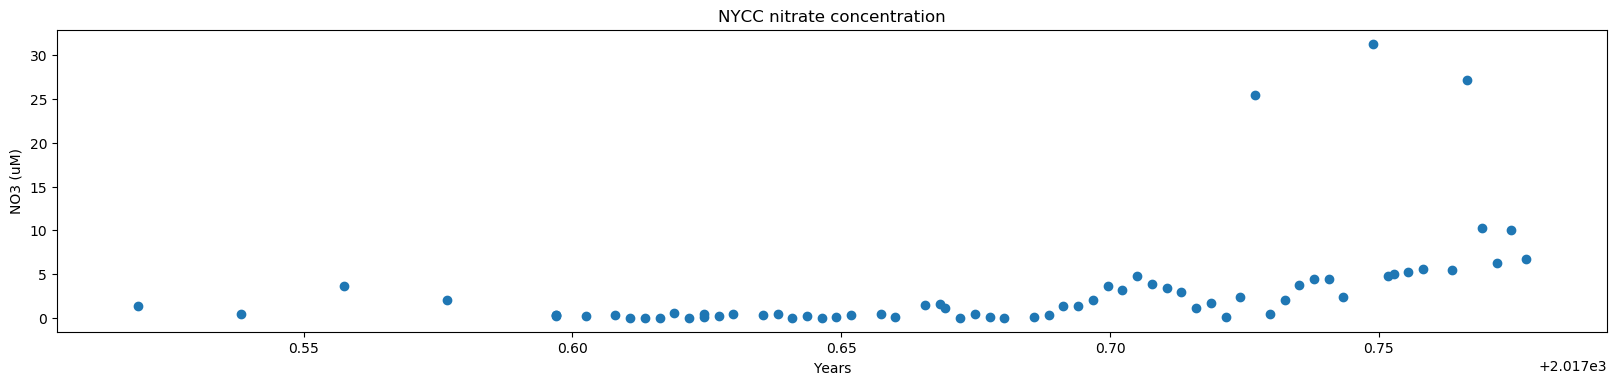

In [33]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+NO3_daysince_NYCC/364.75,NYCC_nutrients_filter.NO3_uM)
plt.xlabel('Years')
plt.ylabel('NO3 (uM)')
plt.title('NYCC nitrate concentration')
#ax.set_xticks(np.arange(1999,2019,1))

# Compare coverage of data sets (i.e. sample frequency)¶

(2017.5, 2017.8)

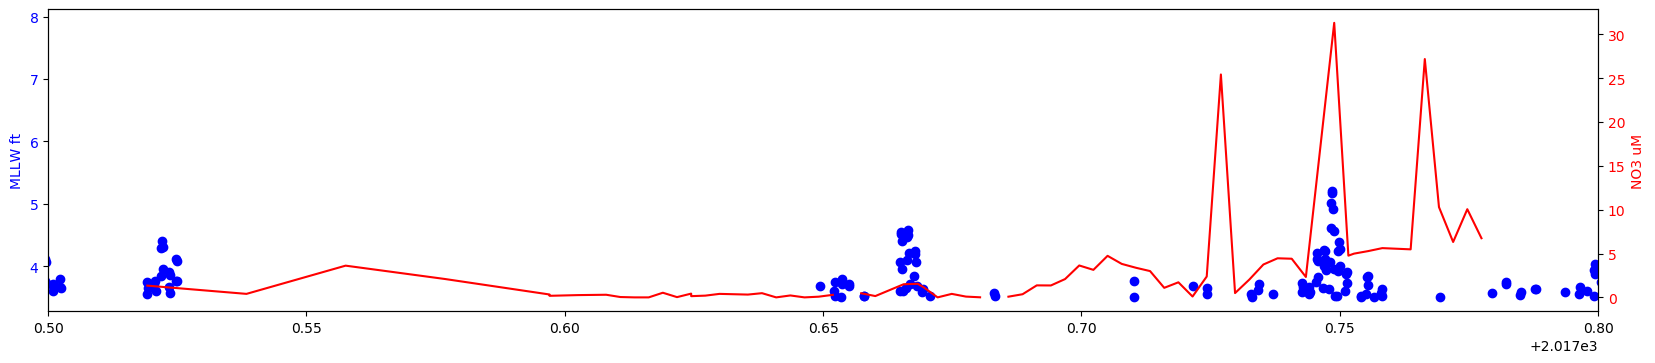

In [34]:
# plot nitrate and water level values in the same figure

fig,ax1=plt.subplots(figsize=(20,4),dpi=100,sharex='all')
ax2=ax1.twinx()

#set variable 1
l1=ax1.scatter(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3.5)]/364.75,MLLW_Sewells.Verified_ft[(MLLW_Sewells.Verified_ft>3.5)],color='b')
ax1.set_ylabel(r'MLLW ft',color='b')
ax1.tick_params(axis='y',labelcolor='b')
ax1.set_xlim(2017.5,2017.8)

#set variable 2
l2=ax2.plot(1900+NO3_daysince_NYCC/364.75,NYCC_nutrients_filter.NO3_uM,color='r')
ax2.set_ylabel(r'NO3 uM',color='r')
ax2.tick_params(axis='y',labelcolor='r')
ax2.set_xlim(2017.5,2017.8)